In [11]:
from Graph import Graph

# initialize graph
graph = Graph()

In [12]:
import pandas as pd

# helper function to add a group of connected players to graph
# typical usage: sending an array of players on the same team
def addPlayersToGraph(graph, players):
    numPlayers = len(players)

    # iterate through each player
    for i in range(0, numPlayers):
        player0 = players[i]

        # add connections to all players that aren't the 'player0'
        for j in range(i + 1, numPlayers):
            player1 = players[j]
            graph.addNeighbor(player0, player1)

players = []

# read all csv files containing players and place into a graph
end_year = 2021
for year in range(2002, end_year + 1):
    df = pd.read_csv(f"player_data/nfl_players_data_{year}.csv")

    teams = {}

    # add each player to team
    for row in df.iterrows():
        content = row[1]
        team = content["team"]

        if teams.get(team) == None:
            teams[team] = []
            
        teams[team].append(content["playerid"])
        players.append(content["playerid"])

    # fill in teams
    for team in teams:
        addPlayersToGraph(graph, teams[team])

In [16]:
import random

# find distance between two players based on id
def get_path_between_players(player0, player1):
    return graph.bfs(player0, player1)

avg_length = 0
num_samples = 2000

seen_connections = set()
paths = []

for _ in range(num_samples):
    # continue searching for compatible players
    p1, p2 = random.choice(players), random.choice(players)
    while (p1, p2) in seen_connections or (p2, p1) in seen_connections:
        p1, p2 = random.choice(players), random.choice(players)

    # add to seen connections
    seen_connections.add((p1, p2))

    # add to seen paths
    path = get_path_between_players(
        p1, p2
    )
    paths.append(len(path))



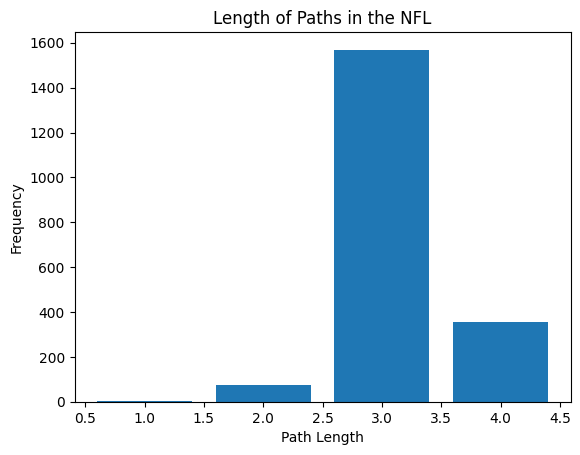

In [19]:
import matplotlib.pyplot as plt

# graph the paths
freq = {}
for i in paths:
    freq[i] = freq.get(i, 0) + 1
freq = dict(sorted(freq.items()))

# Plot the bar graph
plt.bar(freq.keys(), freq.values())
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.title('Length of Paths in the NFL')
plt.show()
